# Predicting Housing Prices with Random Forest and XGBoost

In the realm of real estate, the ability to accurately predict housing prices is a valuable asset. Whether you are a homebuyer looking for a fair deal or a seller aiming to optimize your listing price, having a reliable model to estimate housing prices can make all the difference. In this project, I aim to predict housing prices using tree-based machine learning models. The data used in this Jupyter notebook is the well-known Ames housing data set. More details about the data can be found here: https://jse.amstat.org/v19n3/decock.pdf

## Approach
* Exploratory Data Analysis
* Feature Engineering
* Model Tuning
* Evaluation

## Import Packages

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")
pd.set_option("max.columns", 100)
pd.set_option("max.rows", 81)
sns.set_style("darkgrid")

## Load Data

In [2]:
# Import data
df = pd.read_csv("Ames_Housing_Data.csv")
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.

In [3]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [4]:
# Drop PID (ID) column
df = df.drop("PID", axis=1)
df.head(2)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


In [5]:
# Summary statistics
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## EDA and Preprocessing

In [6]:
# Check for missing values
df.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air           0
Electrical      

In [7]:
# Function to only return columns w missing values in percentage
def percent_missing(df):
    percent_nan = 100 * df.isna().mean()
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)
    return percent_nan

In [8]:
# Missing values in percentage
percent_missing(df)

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
Garage Cars        0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
BsmtFin SF 1       0.034130
Electrical         0.034130
dtype: float64

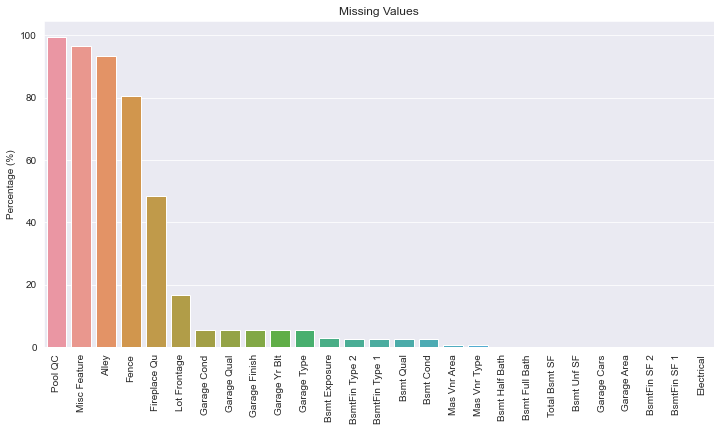

In [9]:
# Plot missing values
plt.figure(figsize=(12,6))
sns.barplot(x=percent_missing(df).index, y=percent_missing(df))

plt.title("Missing Values")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=90)
plt.show()

## Fill Categorical Missing Values

In [10]:
# Categorical features where missing values represent "None"
string_nan_none = ["Alley", "Misc Feature", "Fence", "Fireplace Qu","Garage Finish","Garage Qual",
                   "Garage Cond", "Garage Type","Bsmt Exposure","BsmtFin Type 2","Bsmt Qual",
                   "Bsmt Cond","BsmtFin Type 1", "BsmtFin Type 2", "Pool QC"]

# Fill NaNs with "None"
for column in string_nan_none:
    df[column] = df[column].fillna("None")

# Categorical features to be imputed with the mode
string_nan_mode = ["Electrical", "Mas Vnr Type"]

# Fill NaNs using the column mode 
for column in string_nan_mode:
    df[column] = df[column].fillna(df[column].mode()[0])

In [11]:
df.isna().sum()

MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley                0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         1
BsmtFin Type 2       0
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF 

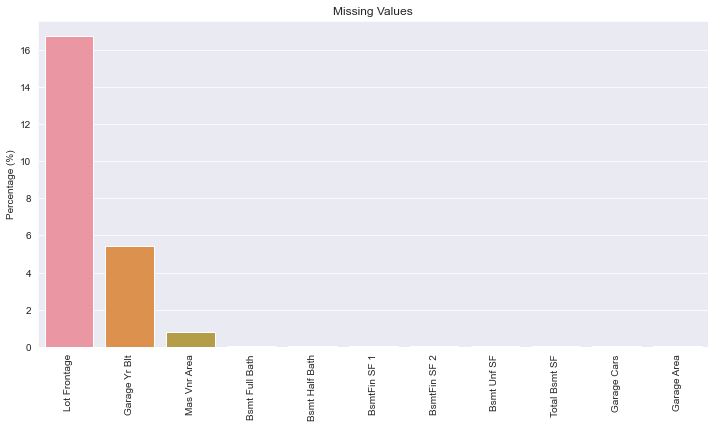

In [12]:
# Plot missing values
plt.figure(figsize=(12,6))
sns.barplot(x=percent_missing(df).index, y=percent_missing(df))

plt.title("Missing Values")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=90)
plt.show()

## Fill Numeric Missing Values

In [13]:
# numeric features w missing values that represent zero
num_cols = ["BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF","Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath",
            "Garage Yr Blt", "Garage Area", "Garage Cars", "Mas Vnr Area"]

for column in num_cols:
    df[column] = df[column].fillna(0)

In [14]:
# Checking if there are any missing values left
df.isna().sum()[df.isna().sum()>0]

Lot Frontage    490
dtype: int64

In [15]:
# Fill NaNs in Lot Frontage with the average Lot frontage for the given neighborhood
df["Lot Frontage"] = df.groupby(["Neighborhood"])[["Lot Frontage"]].transform(lambda value: value.fillna(value.mean()))

In [16]:
# Mean Lot Frontage per Neighborhood
df.groupby(["Neighborhood"])["Lot Frontage"].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.241379
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [17]:
# Fill the missing values with 0
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

In [18]:
print("Total number of missing values:", df.isna().sum().sum())

Total number of missing values: 0


## Correlation 

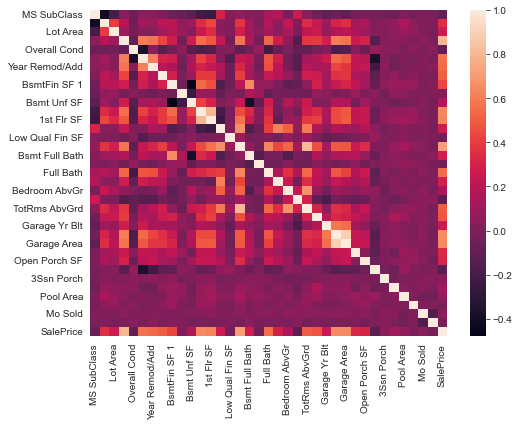

In [19]:
# Plotting correlation with the target SalePrice
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())
plt.show()

In [20]:
# Correlation with SalePrice (target)
round(df.corr()["SalePrice"].sort_values(ascending=False),2)

SalePrice          1.00
Overall Qual       0.80
Gr Liv Area        0.71
Garage Cars        0.65
Garage Area        0.64
Total Bsmt SF      0.63
1st Flr SF         0.62
Year Built         0.56
Full Bath          0.55
Year Remod/Add     0.53
Mas Vnr Area       0.50
TotRms AbvGrd      0.50
Fireplaces         0.47
BsmtFin SF 1       0.43
Lot Frontage       0.35
Wood Deck SF       0.33
Open Porch SF      0.31
Half Bath          0.29
Bsmt Full Bath     0.28
2nd Flr SF         0.27
Lot Area           0.27
Garage Yr Blt      0.25
Bsmt Unf SF        0.18
Bedroom AbvGr      0.14
Screen Porch       0.11
Pool Area          0.07
Mo Sold            0.04
3Ssn Porch         0.03
BsmtFin SF 2       0.01
Misc Val          -0.02
Yr Sold           -0.03
Bsmt Half Bath    -0.04
Low Qual Fin SF   -0.04
MS SubClass       -0.09
Overall Cond      -0.10
Kitchen AbvGr     -0.12
Enclosed Porch    -0.13
Name: SalePrice, dtype: float64

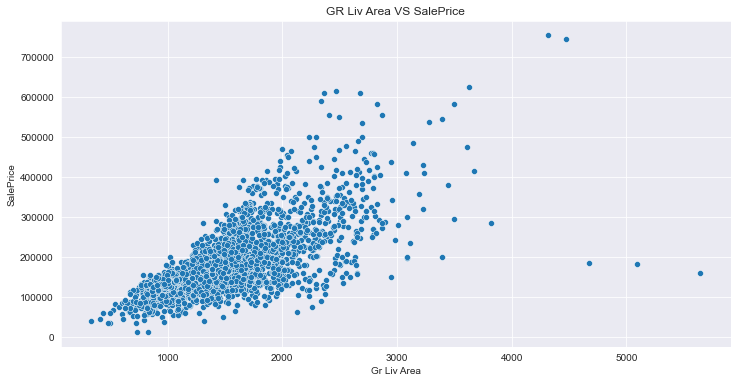

In [21]:
# Plot relationship between "SalePrice" and "GR Liv Area"
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["Gr Liv Area"], y=df["SalePrice"])
plt.title("GR Liv Area VS SalePrice")
plt.show()

In [22]:
# Locating the extreme outliers to the right
index_outliers = df[(df["SalePrice"] < 300000) & (df["Gr Liv Area"] > 4000)].index
index_outliers

Int64Index([1498, 2180, 2181], dtype='int64')

In [23]:
# Filter out the extreme outliers to the right
df = df.drop(index=index_outliers)
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.000000,31770,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,215000
1,20,RH,80.000000,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
2,20,RL,81.000000,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.000000,11160,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,244000
4,60,RL,74.000000,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.000000,7937,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,None,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,None,GdPrv,None,0,3,2006,WD,Normal,142500
2926,20,RL,75.144444,8885,Pave,None,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,None,MnPrv,None,0,6,2006,WD,Normal,131000
2927,85,RL,62.000000,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,None,None,0.0,None,0.0,0.0,None,None,

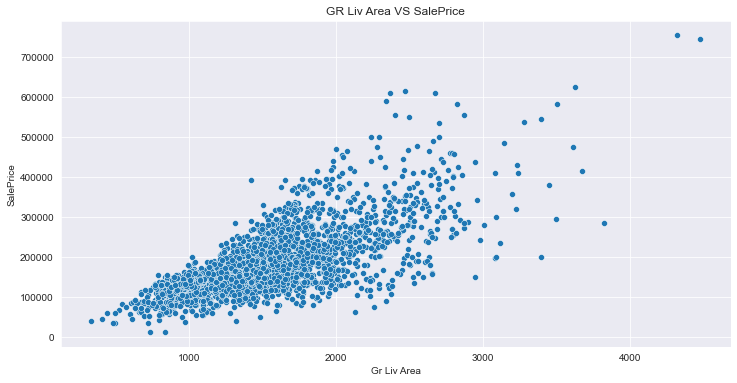

In [24]:
# Plot relationship without the extreme outliers
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["Gr Liv Area"], y=df["SalePrice"])
plt.title("GR Liv Area VS SalePrice")
plt.show()

## Feature Transformations

In [25]:
# Transform building class to categorical
df["MS SubClass"] = df["MS SubClass"].apply(str) 
# Transform month sold to categorical
df["Mo Sold"] = df["Mo Sold"].apply(str) 

In [26]:
# Subset numerical and categorical features
numerical_col = df.select_dtypes(np.number).drop("SalePrice", axis=1)
categorical_col = df.select_dtypes("object")

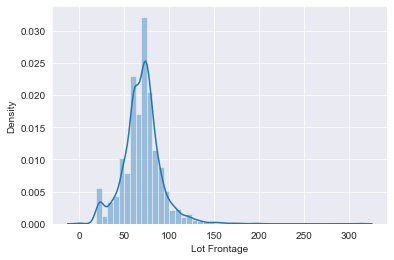

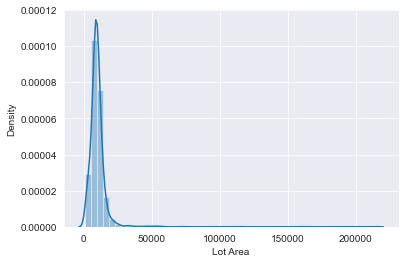

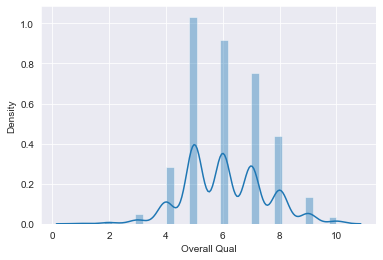

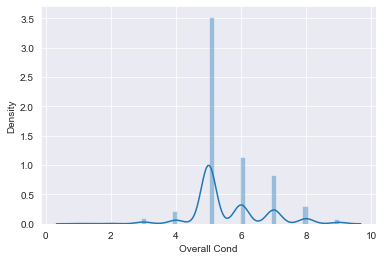

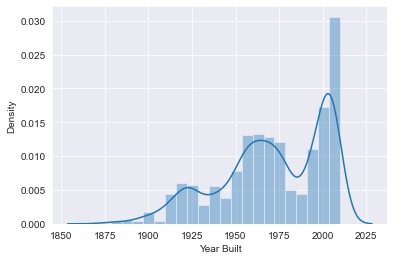

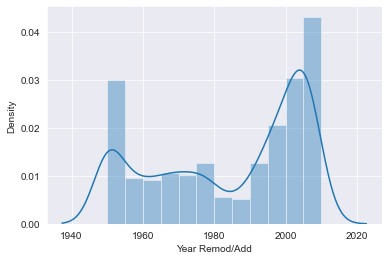

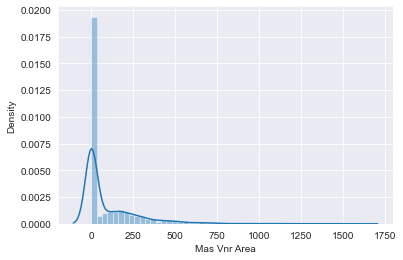

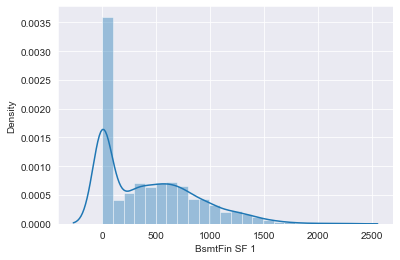

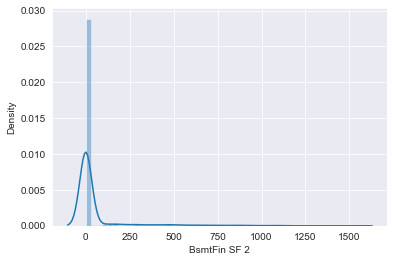

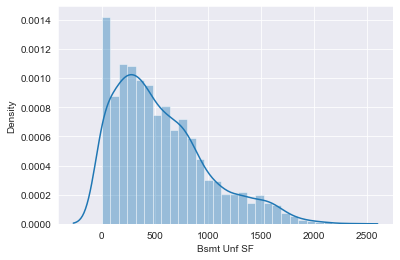

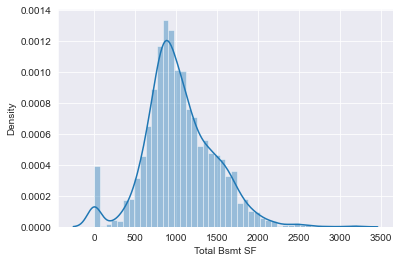

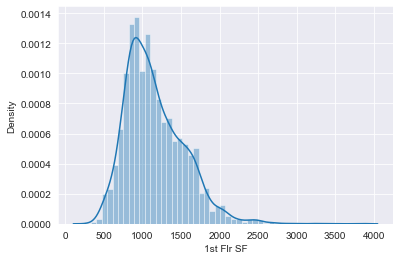

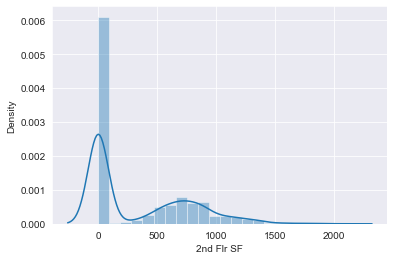

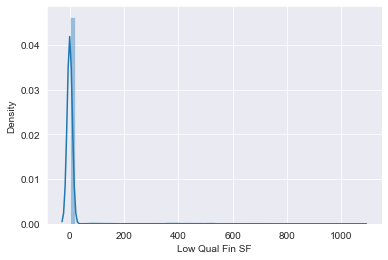

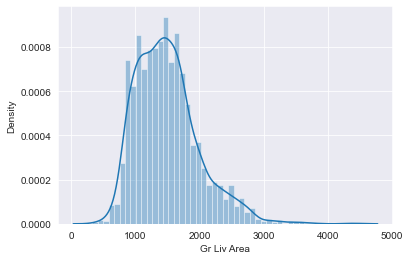

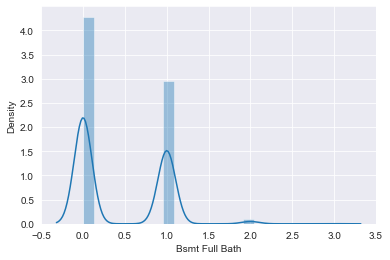

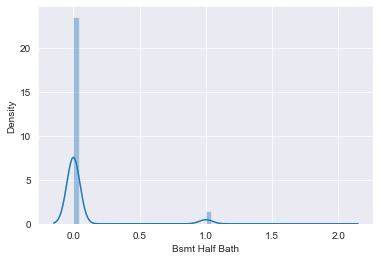

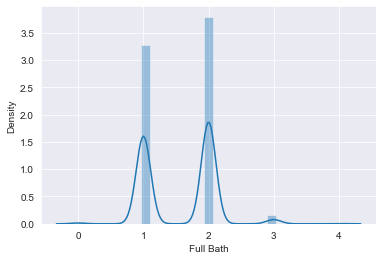

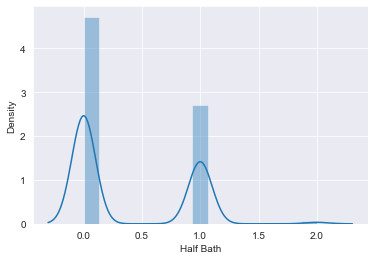

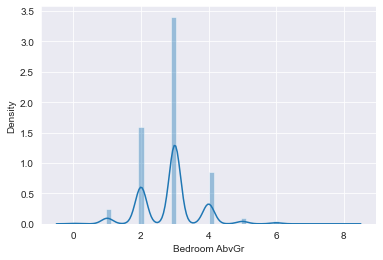

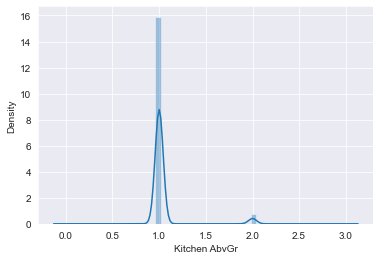

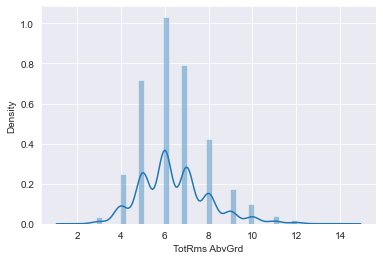

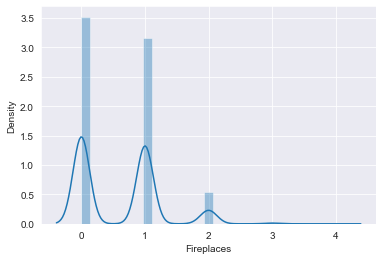

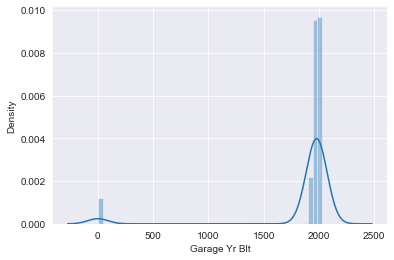

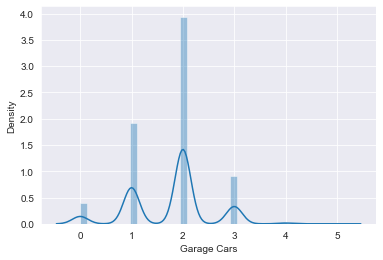

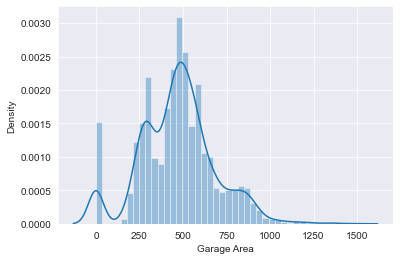

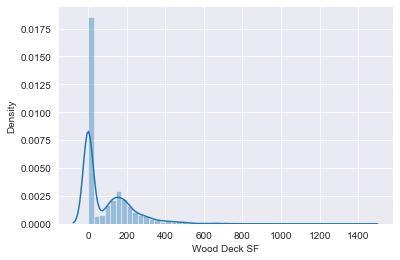

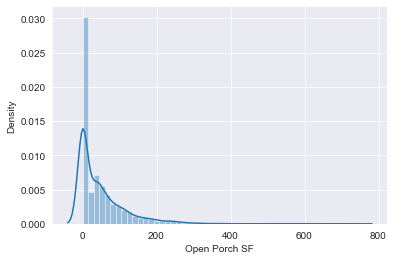

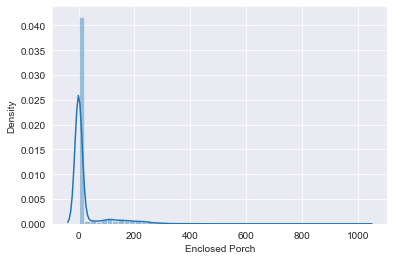

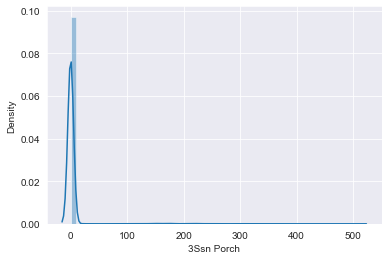

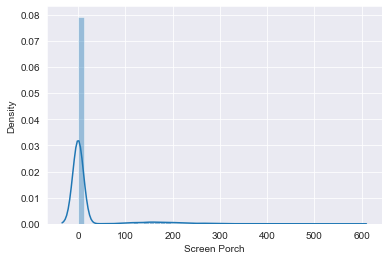

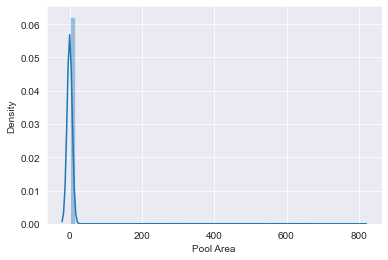

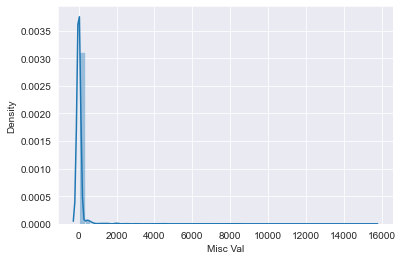

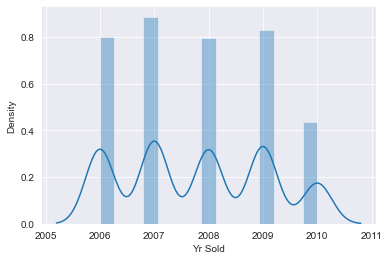

In [27]:
# Checking distribution of numerical features
for column in numerical_col:
    x = df[column]
    sns.distplot(x, kde=True)
    plt.show()

In [28]:
# Checking the skewness of numerical features
df_skew = pd.DataFrame(numerical_col.columns, columns=["Feature"])
df_skew["Skew"] = df_skew["Feature"].apply(lambda feature: stats.skew(numerical_col[feature]))
df_skew["Absolute_Skew"] = df_skew["Skew"].apply(abs)

df_skew["Skewed"] = df_skew["Absolute_Skew"].apply(lambda x: True if x>=0.5 else False)
df_skew.sort_values("Absolute_Skew", ascending=False).head(10)

,Feature,Skew,Absolute_Skew,Skewed
32,Misc Val,22.221198,22.221198,True
31,Pool Area,17.719247,17.719247,True
1,Lot Area,13.178732,13.178732,True
13,Low Qual Fin SF,12.105635,12.105635,True
29,3Ssn Porch,11.391990,11.391990,True
20,Kitchen AbvGr,4.309065,4.309065,True
8,BsmtFin SF 2,4.136226,4.136226,True
28,Enclosed Porch,4.010074,4.010074,True
30,Screen Porch,3.953057,3.953057,True
16,Bsmt Half Bath,3.952498,3.952498,True


In [29]:
# Log transformation of skewed features
skewed_features = df_skew[df_skew["Skewed"] == True]["Feature"].values

for column in skewed_features:
    df[column] = np.log1p(df[column])

In [30]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,4.955827,10.366309,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1.791759,7.581210,1960,Hip,CompShg,BrkFace,Plywood,Stone,4.727388,TA,TA,CBlock,TA,Gd,Gd,BLQ,6.461468,Unf,0.000000,6.091310,1080.0,GasA,Fa,Y,SBrkr,7.412764,0.000000,0.0,7.412764,0.693147,0.0,1,0.000000,3,0.693147,TA,2.079442,Typ,1.098612,Gd,Attchd,7.581210,Fin,2.0,528.0,TA,TA,P,5.351858,4.143135,0.0,0.0,0.000000,0.0,None,None,None,0.000000,5,2010,WD,Normal,215000
1,20,RH,4.394449,9.360741,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,1.945910,7.581720,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,6.150603,LwQ,4.976734,5.602119,882.0,GasA,TA,Y,SBrkr,6.799056,0.000000,0.0,6.799056,0.000000,0.0,1,0.000000,2,0.693147,TA,1.791759,Typ,0.000000,None,Attchd,7.581720,Unf,1.0,730.0,TA,TA,Y,4.948760,0.000000,0.0,0.0,4.795791,0.0,None,MnPrv,None,0.000000,6,2010,WD,Normal,105000
2,20,RL,4.406719,9.565775,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1.945910,7.580189,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,4.691348,TA,TA,CBlock,TA,TA,No,ALQ,6.828712,Unf,0.000000,6.008813,1329.0,GasA,TA,Y,SBrkr,7.192934,0.000000,0.0,7.192934,0.000000,0.0,1,0.693147,3,0.693147,Gd,1.945910,Typ,0.000000,None,Attchd,7.580189,Unf,1.0,312.0,TA,TA,Y,5.976351,3.610918,0.0,0.0,0.000000,0.0,None,None,Gar2,9.433564,6,2010,WD,Normal,172000
3,20,RL,4.543295,9.320181,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,1.791759,7.585281,1968,Hip,CompShg,BrkFace,BrkFace,None,0.000000,Gd,TA,CBlock,TA,TA,No,ALQ,6.971669,Unf,0.000000,6.952729,2110.0,GasA,Ex,Y,SBrkr,7.654917,0.000000,0.0,7.654917,0.693147,0.0,2,0.693147,3,0.693147,Ex,2.197225,Typ,1.098612,TA,Attchd,7.585281,Fin,2.0,522.0,TA,TA,Y,0.000000,0.000000,0.0,0.0,0.000000,0.0,None,None,None,0.000000,4,2010,WD,Normal,244000
4,60,RL,4.317488,9.534668,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,1.791759,7.599902,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,6.674561,Unf,0.000000,4.927254,928.0,GasA,Gd,Y,SBrkr,6.834109,6.553933,0.0,7.396335,0.000000,0.0,2,0.693147,3,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,7.599902,Fin,2.0,482.0,TA,TA,Y,5.361292,3.555348,0.0,0.0,0.000000,0.0,None,MnPrv,None,0.000000,3,2010,WD,Normal,189900


In [31]:
# Get dummy variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,...,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_None,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Mo Sold_10,Mo Sold_11,Mo Sold_12,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,4.955827,10.366309,6,1.791759,7.581210,1960,4.727388,6.461468,0.000000,6.091310,1080.0,7.412764,0.000000,0.0,7.412764,0.693147,0.0,1,0.000000,3,0.693147,2.079442,1.098612,7.581210,2.0,528.0,5.351858,4.143135,0.0,0.0,0.000000,0.0,0.000000,2010,215000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,5.602119,882.0,6.799056,0.000000,0.0,6.799056,0.000000,0.0,1,0.000000,2,0.693147,1.791759,0.000000,7.581720,1.0,730.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,2010,105000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,6.008813,1329.0,7.192934,0.000000,0.0,7.192934,0.000000,0.0,1,0.693147,3,0.693147,1.945910,0.000000,7.580189,1.0,312.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,2010,172000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4.543295,9.320181,7,1.791759,7.585281,1968,0.000000,6.971669,0.000000,6.952729,2110.0,7.654917,0.000000,0.0,7.654917,0.693147,0.0,2,0.693147,3,0.693147,2.197225,1.098612,7.585281,2.0,522.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,2010,244000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,4.927254,928.0,6.834109,6.553933,0.0,7.396335,0.000000,0.0,2,0.693147,3,0.693147,1.945910,0.693147,7.599902,2.0,482.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,2010,189900,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Target Transformation

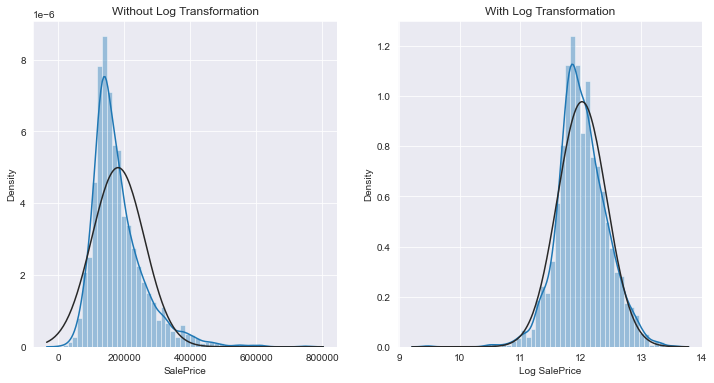

In [32]:
# Plotting the distribution of the target variable
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df["SalePrice"], kde=True, fit=stats.norm)
plt.title("Without Log Transformation")

plt.subplot(1,2,2)
sns.distplot(np.log(df["SalePrice"]), kde=True, fit=stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transformation")

plt.show()

In [33]:
# Transform the target variable
df["SalePrice"] = np.log(df["SalePrice"])

## Train Test Split 

In [34]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (2341, 297)
X_test: (586, 297)
y_train: (2341,)
y_test: (586,)


## Feature Scaling

In [35]:
# Scaling of numerical features
scaler = StandardScaler()
X_train.loc[:, numerical_col.columns] = scaler.fit_transform(X_train.loc[:, numerical_col.columns])
X_test.loc[:, numerical_col.columns] = scaler.transform(X_test.loc[:, numerical_col.columns])

X_train.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),...,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Fa,Pool QC_Gd,Pool QC_None,Pool QC_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Mo Sold_10,Mo Sold_11,Mo Sold_12,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2262,0.820071,0.428321,1.371325,-0.454648,1.174389,1.091532,0.865676,-1.418480,-0.362975,0.925405,1.276069,1.130281,-0.854526,-0.111145,0.318999,-0.831037,-0.25031,0.796474,-0.756118,0.192893,-0.193621,0.469986,0.759091,0.237218,1.660201,1.185445,0.838205,0.583415,-0.432184,-0.115241,-0.310503,-0.065273,-0.193362,-0.595537,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1678,-2.771964,-2.953007,-0.786599,-0.454648,-0.032708,-0.692609,1.371146,-1.418480,-0.362975,0.442209,-0.995970,-1.755121,1.134696,-0.111145,-0.261139,-0.831037,-0.25031,0.796474,1.279151,0.192893,-0.193621,-0.176517,-0.997643,0.225928,0.317703,-0.155327,-0.943401,-1.092966,-0.432184,-0.115241,-0.310503,-0.065273,-0.193362,-0.595537,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2778,1.001052,0.830927,0.652017,-0.454648,1.012574,0.850432,-0.809658,0.783352,-0.362975,-0.122831,-0.305425,-0.559756,1.237418,-0.111145,0.842333,1.143287,-0.25031,0.796474,1.279151,0.192893,-0.193621,1.040243,-0.997643,0.235705,0.317703,0.091908,0.983089,1.006290,-0.432184,-0.115241,-0.310503,-0.065273,-0.193362,-1.356538,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2506,-2.168742,-2.044467,0.652017,-0.454648,1.109712,0.995092,-0.809658,-1.418480,-0.362975,0.416423,-1.068405,-2.360638,1.100131,6.845026,-0.513111,-0.831037,-0.25031,0.796474,1.279151,-1.024257,-0.193621,-1.805576,-0.997643,0.236613,0.317703,0.034854,-0.943401,1.283081,-0.432184,-0.115241,-0.310503,-0.065273,-0.193362,-1.356538,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1088,-0.718235,-0.197834,-0.067291,-0.454648,1.109712,0.995092,-0.809658,-1.418480,-0.362975,0.518631,-0.759350,-1.298767,1.159113,-0.111145,0.084170,-0.831037,-0.25031,0.796474,1.279151,0.192893,-0.193621,1.040243,-0.997643,0.236613,0.317703,-0.345507,0.838205,0.401408,-0.432184,-0.115241,-0.310503,-0.065273,-0.193362,0.165463,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [36]:
# 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42,)

## Random Forest

In [37]:
# Create basemodel
rf_model = RandomForestRegressor(random_state=42)

# Define parameter grid for tuning
param_grid_rf ={
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 4, 8],
    "min_samples_split": [2, 5, 10]
}

# Create the GridSearCV object
grid_model = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,
                          scoring="neg_mean_squared_error",
                          cv=cv, verbose=1)

# Fit the model on the training data
grid_model.fit(X_train, y_train)

print("Best parameters for RandomForest: ", grid_model.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for RandomForest:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}


In [38]:
# Make predictions with tuned rf_model
rf_pred = grid_model.predict(X_test)
rf_RMSE = np.sqrt(mean_squared_error(y_test, rf_pred))
print("RandomForest Test RMSE:", rf_RMSE)

RandomForest Test RMSE: 0.12254172874331125


## XGBoost

In [40]:
# Create basemodel
xgb_model = XGBRegressor()

# Define parameter grid for tuning
param_grid_xgb = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": [3, 6, 10]
}

# Create GridSearchCV object
grid_model = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                         scoring="neg_mean_squared_error",
                         cv=cv, verbose=1)

# Fit the model on the training data
grid_model.fit(X_train, y_train)

print("Best parameters for XGBoost: ", grid_model.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [41]:
# Make predictions with xgb_model
xgb_pred = grid_model.predict(X_test)
xgb_RMSE = np.sqrt(mean_squared_error(y_test, xgb_pred))
print("XGBoost Test RMSE: ", xgb_RMSE)

XGBoost Test RMSE:  0.10351794869951547


## Final Results

In [42]:
print("XGBoost RMSE:", xgb_RMSE)
print("Random Forest RMSE:", rf_RMSE)

XGBoost RMSE: 0.10351794869951547
Random Forest RMSE: 0.12254172874331125
